In [1]:
import importlib
import Agenter
import Modell
import numpy as np

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

N = 100000
width = 140
height = 70
initial_infected = 100
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

S_history = []
I_history = []
R_history = []
D_history = []

for t in range(timesteps):
    model.step()
    S_history.append(model.count_status("S"))
    I_history.append(model.count_status("I"))
    R_history.append(model.count_status("R"))
    D_history.append(model.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))



S: 8
I: 0
R: 98928
D: 1064


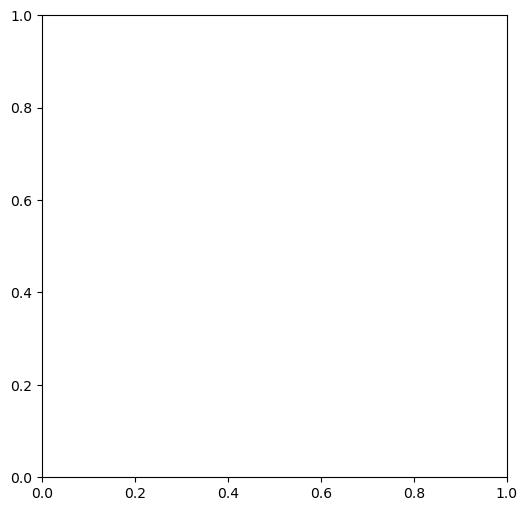

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))

In [4]:
heatmap_data = np.zeros((width, height))
heatmap = ax.imshow(heatmap_data, cmap="hot", origin="lower",
                    vmin=0, vmax=20, extent=[0, 100, 0, 100])


In [5]:
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_title("Heatmap över infekterade")

plt.colorbar(heatmap, ax=ax, label="Antal infekterade")

/var/folders/y9/d3b2_49x0217c0xnb2k2n1z40000gn/T/ipykernel_39378/4069225089.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(heatmap, ax=ax, label="Antal infekterade")


<Figure size 640x480 with 0 Axes>

In [11]:
def update(frame):
    timestep = model.SIRAgenter[frame]

    # Välj bara infekterade agenter
    infected = [(x, y) for (x, y, state) in timestep if state == "I"]

    if len(infected) == 0:
        xs = []
        ys = []
    else:
        xs, ys = zip(*infected)

    # Bygg nytt histogram för heatmap
    heatmap_data, _, _ = np.histogram2d(xs, ys, bins=bins, range=[[0, 100], [0, 100]])

    # Uppdatera heatmapen
    heatmap.set_data(heatmap_data.T)  # OBS: transponera för korrekt orientering
    ax.set_title(f"Heatmap över infekterade — Time step {frame}")

    return [heatmap]



In [12]:
anim = FuncAnimation(fig, update, frames= N, interval=200)

In [13]:
anim.save("measles_heatmap.mp4", fps=5)

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range